# **Classificação dos Tipos de Câncer de Pele**

**Turma:** 3DTS  
**Professor**: Felipe Theodoro  
**Grupo:** Marcus Vinicius, Saulo Madruga e Clara Silva.

## Enunciado Exercicío 3

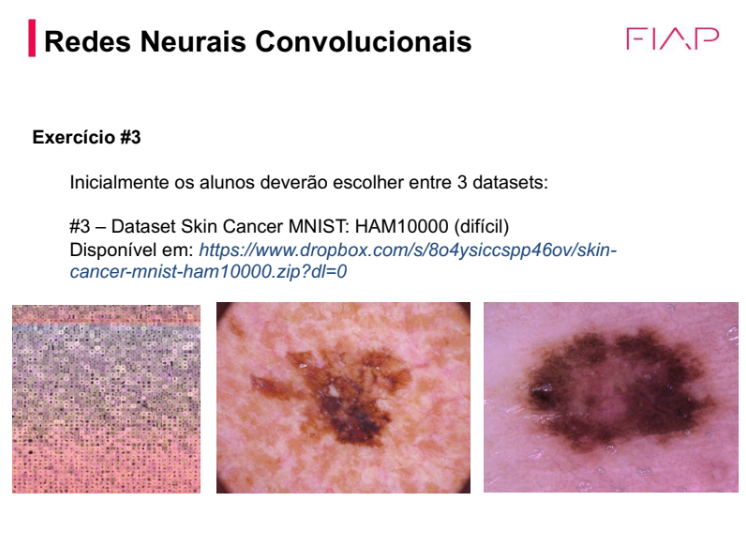

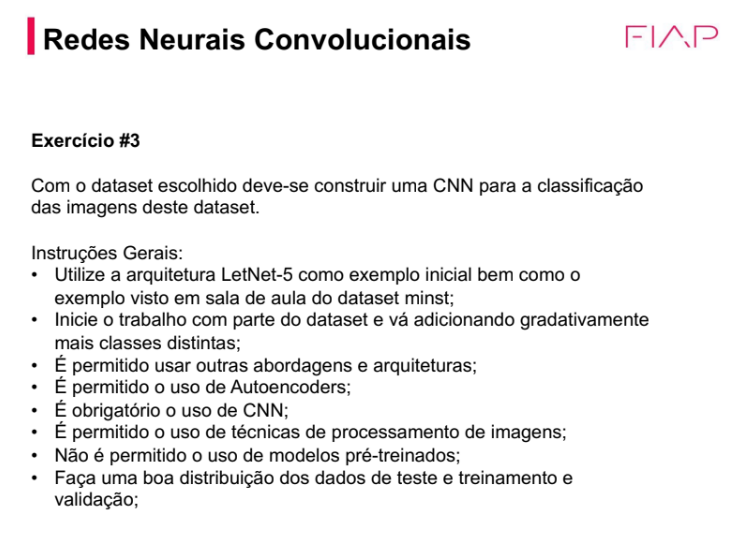

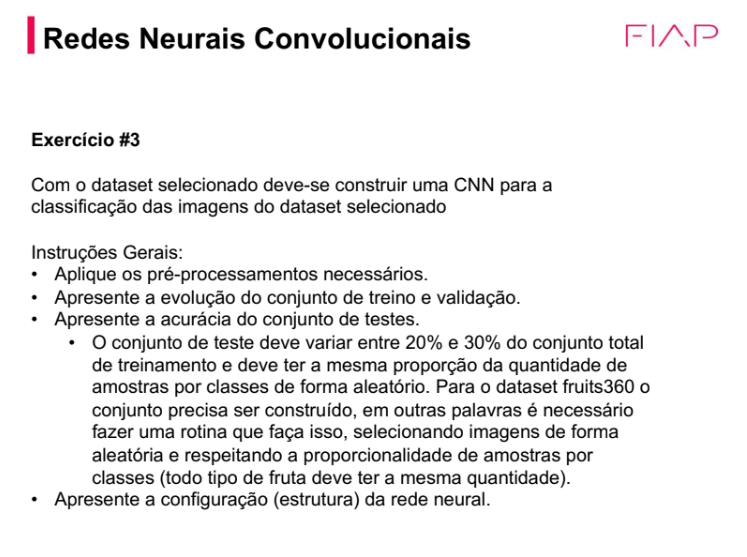

## Introdução
No exercício #3 da matéria de Deep Learning ll do MBA de Data Science, foi proposto para que façamos um classificador para os tipos de cancer de pele do dataset Skin Cancer MNIST:HAM 10.000, utilizando redes neurais convolucionais e tudo que aprendemos em sala de aula.

## Sobre o Câncer de Pele
O câncer de pele no Brasil, responde por 33% de todos os diagnósticos desta doença, é registrado a cada ano cerca de 185 mil novos casos, segundo o Instituto Nacional de Câncer (INCA). A doença é provocada peo crescimento anormal e descontrolado das células que compõem a pele. Essas células se dispõem formando camadas e, de acordo com as que forem afetadas, são definidos os diferentes tipos de câncer. Basicamente há 3 tipos de cancer de pele, cada um possui suas características, sendo eles:

**Carcinoma basocelular (CBC):** o tipo mais prevalente entre todos os outros, possui baixa letalidade e pode ser curado em caso de detecção precoce, através de exames. Normalmente surgem em regiões expostas ao sol, como orelhas, pescoço, couro cabeludo, ombros e costas.

**Carcinoma espinocelular (CEC):** o segundo mais prevalente, manifesta-se nas células escamos, que são maioria nas camadas superiores da pele. Pode se desenvolver em todas as partes do corpo, porém seja mais comu nas áreas expostas ao sol também, como orelhas, rosto, pescoço e couro cabeludo. Segundo pesquisas, é mais comum em Homens do que em Mulheres. A exposição ao Sol é o principal fator desse tipo, porém não o único, pode ser associado também a feridas crônicas e cicatrizes na pele, uso de drogas, antirrejeição de órgãos transplatados e exposição a certos agentes químicos ou à radiação. 

**Melanoma:** este é o tipo menos frequente dentre todos os tipos, o melannoma tem o pior prognóstico e o mais alto índice de mortalidade. Embora o diagnóstico traga medo e apreensão aos pacientes, as chances de cura são de mais de 90%, quando a detecção é precoce. Geralmente, as lesões causadas por esse tipo surgem em áreas difíceis de serem visualizadas pelo paciente, embora sejam mais comuns nas pernas e em mulheres; nos troncos, nos homens; e pescoço e rosto em ambos os sexos.


Pessoas que possuem a pele clara e que se queimam com facilidade quando se expõem ao sol possuem mais risco de desenvolver a doença, pode-se desenvolver também em indivíduos negros, ainda que raramente. Normalmente surgem em áreas do corpo mais expostas à radiação solar. Em estágios iniciais, o melanoma se desenvolve apenas nas camadas mais superficiais da pele, o que facilita a remoção cirúrgica e a cura do tumor. Em casos mais avançados, a lesão é profunda e espessa, o que aumenta a chance de se espalhar para outros órgãos (metástase) e diminui as possibilidades de cura. Por isso, o diagnóstico precoce do melanoma é fundamental, para que o paciente possua possibilidades de um aumento na sobrevida e na qualidade de vida.

*Fonte: https://www.sbd.org.br/doencas/cancer-da-pele/*

# **Código Fonte**

## Bibliotecas e Importação do Dataset

Abaixo estão todas as bibliotecas necessárias para realizar a importação dos dados, construção dos gráficos, dos modelos e das métricas. 

In [ ]:
#instala as bibliotecas
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install tensorflow

In [1]:
# blibiotecas
# manipulacao dos dados
import os
import shutil
from glob import glob
import pandas as pd
import numpy as np

# graficos
import matplotlib.pyplot as plt
import seaborn as sns
# define aparencia dos graficos
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette='husl')

# modelo e metricas
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

As imagens estão dividas em 02 datasets, sendo assim, teremos que acessar a pasta raiz onde estão as imagens e o dataset em formato .csv que contém informações gerais sobre os casos.

In [2]:
# entra na pasta onde estao as imagens e o dataset
pasta_dados = os.path.join('Datasets')

A seguir, faremos uma análise superficial de como estão os dados.

In [3]:
# importa dados com nome e classe de cada imagem
dados_cancer_pele = pd.read_csv(os.path.join(pasta_dados, 'HAM10000_metadata.csv'))

# mostra as primeiras 5 linhas
dados_cancer_pele.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
# tipo de cada variavel
dados_cancer_pele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [7]:
# tamanho e quantidade de variaveis no dataset
dados_cancer_pele.shape

(10015, 7)

O dataset possui 10.015 registros e 7 variaveis.

Abaixo está o dicionário dos dados para um melhor entendimento das variáveis a quais estamos trabalhando.

**DICIONÁRIO DE DADOS**

**lesion_id:** ID da lesão.  

**image_id:** ID da imagem.  

**dx:** tipo de lesão na pele, sendo elas:  
- nv = Nevo melanocítico  
- mel = Melanoma  
- bkl = Lesões tipo queratose benigna  
- bcc = Carcinoma basocelular  
- akiec = Queratoses actínicas  
- vasc = Lesões vasculares  
- df = Dermatofibroma  

**dx_type:** como a lesão foi indentificada, sendo eles:  

- histo: 
- confocal: 
- follow-up: 
- consensus: 

**age:** idade do paciente.  

**sex:** sexo do paciente.  

**localization:** localização da lesão.  

## Análise Exploratória dos Dados e Feature Engineering

A seguir, faremos uma análise exploratória dos dados, também verificaremos a quantidade de nulos e caso haja necessidade, faremos uma imputação de dados utilizando alguma medida de posição. 

In [8]:
# verificao de nulos
dados_cancer_pele.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

É possível verificar que há dados faltantes na variável age (idade), sendo assim verificaremos algumas medidas de posição dessa variável e conforme for melhor, imputaremos os dados

In [10]:
# mostra medidas de posicao da variavel age (idade)
print(f'Média da variável age (idade): {(dados_cancer_pele.age.mean()).round(2)}')
print(f'Mediana da variável age (idade): {(dados_cancer_pele.age.median()).round(2)}')
print(f'Desvio Padrão da variável age (idade): {(dados_cancer_pele.age.std()).round(2)}')

Média da variável age (idade): 51.86
Mediana da variável age (idade): 50.0
Desvio Padrão da variável age (idade): 16.97


Nossa média e mediana estão bem próximas, além de possuirmos um desvio padrão relativamente alto.
sendo assim, aplicaremos a mediana como imputação nos dados faltantes.

In [4]:
# imputando os dados
dados_cancer_pele.age.fillna((dados_cancer_pele.age.median()), inplace=True)

Olharemos novamente nossas medidas da variavel age (idade), para verificar como ficou após a imputação dos dados

In [12]:
print(f'Média da variável age (idade): {(dados_cancer_pele.age.mean()).round(2)}')
print(f'Mediana da variável age (idade): {(dados_cancer_pele.age.median()).round(2)}')
print(f'Desvio Padrão da variável age (idade): {(dados_cancer_pele.age.std()).round(2)}')

Média da variável age (idade): 51.85
Mediana da variável age (idade): 50.0
Desvio Padrão da variável age (idade): 16.92


A seguir verificaremos a quantidade de nulos após a imputação de dados. 

In [13]:
# verificao de nulos
dados_cancer_pele.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

A média abaixou 0.01, a mediana permaneceu no mesmo valor e o desvio padrão abaixou 0.05.

Abaixo iremos categorizar a variável dx (tipo de lesão.)

In [5]:
# cria uma variavel categorica da varivavel dx (tipo de lesao)
dados_cancer_pele['dx_categorical'] = pd.Categorical(dados_cancer_pele['dx']).codes
# mostra as 5 primeiras linhas
dados_cancer_pele.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dx_categorical
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2


In [15]:
# classes unicas da variavel dx (tipo de lesao)
dados_cancer_pele.dx.unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [8]:
# classes unicas da varivael dx_categorical
dados_cancer_pele.dx_categorical.unique()

array([2, 5, 3, 4, 6, 1, 0], dtype=int8)

A variável ***dx*** (tipo de lesão) foi transformada em categórica, assim ficando:  

**Nome da variável original:** dx  
**Nome da variável categórica:** dx_categorical  

Classe 0 = 'akiec'  
Classe 1 = 'bcc'  
Classe 2 = 'bkl'  
Classe 3 = 'df'  
Classe 4 = 'mel'  
Classe 5 = 'nv'  
Classe 6 = 'vasc'  


In [18]:
# mostra as primeiras 5 linhas
dados_cancer_pele.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dx_categorical
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2


Abaixo plotaremos a distribuição das variáveis a fim de verificar se há desbalanceamentos e seja necessário, posteriormente trataremos isso.

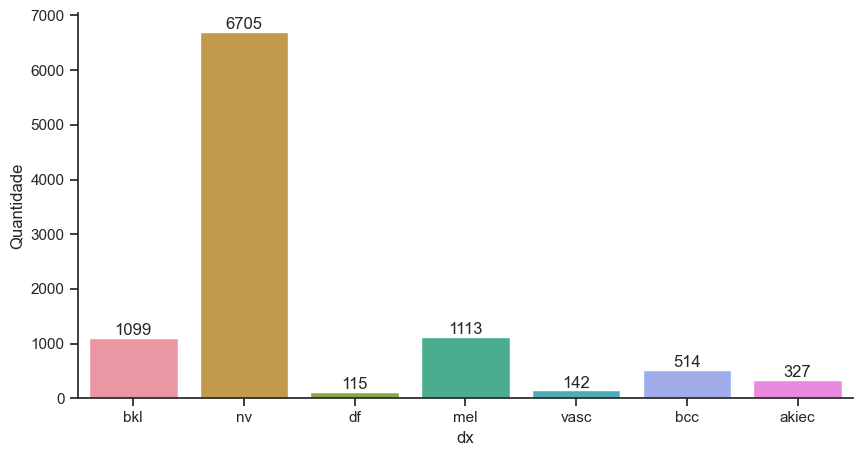

In [19]:
# grafico da variavel dx (tipo de lesao)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(x=dados_cancer_pele.dx, ax=ax)
ax.bar_label(ax.containers[0])
plt.ylabel('Quantidade')
plt.show()

De acordo com o gráfico acima, nota-se que há um um desbalanceamento na variável ***dx (tipo de lesão)***, a classe majoritaria é a ***nv*** que representa o tipo de lesão nevo melanocítico, com 6.705 casos.

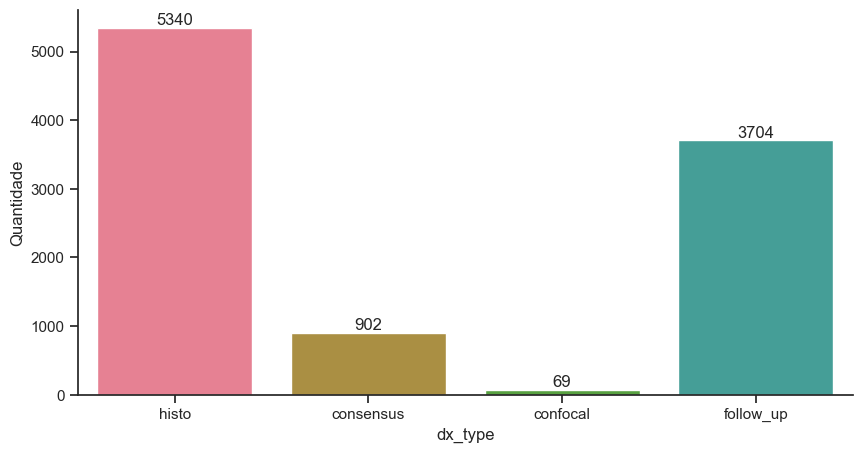

In [20]:
# grafico da variavel dx_type (como a lesao foi indentificada)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(x=dados_cancer_pele.dx_type, ax=ax1)
ax1.bar_label(ax1.containers[0])
plt.ylabel('Quantidade')
plt.show()

Nota-se que a classe majoritária da variavel ***dx_type*** (como a lesao foi indentificada) é a ***histo***, com 5.340 casos, seguida da classe ***follow-up***, com 3.704. Está claro que há um desbalanceamento entre as classes, há 02 classes com muitos dados e 02 que possuem poquíssimos, incluido a classe ***confocal***, que possui 69 casos.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


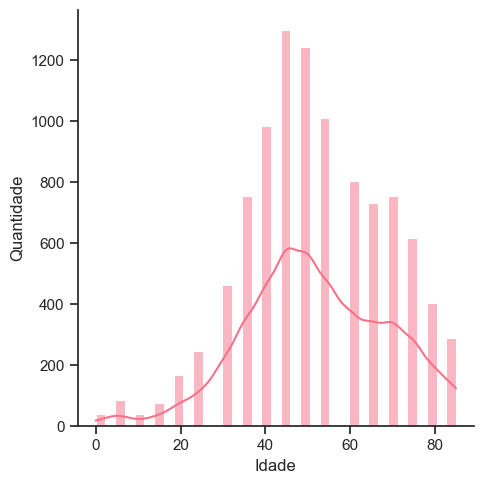

In [21]:
# grafico da distribuicao da idade
sns.displot(x=dados_cancer_pele.age, kde=True)
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.show()

In [22]:
# medidas de posicao da varivael age (idade)
dados_cancer_pele.age.describe()

count    10015.000000
mean        51.853220
std         16.920833
min          0.000000
25%         40.000000
50%         50.000000
75%         65.000000
max         85.000000
Name: age, dtype: float64

As medidas de posição acima nos mostra alguns pontos interessantes, a distribuição está quase que uma distribuição normal, a idade média de quem possui algum tipo de lesão é de 51 anos sendo que a máxima nesse dataset é de 85 anos, porém é possível ver que há alguns casos em que a idade mínima é de 0 anos. Por tanto, iremos selecionar somente faixa etária de 0 a 10 anos para verificar quais foram os tipos de lesões que ocorreram.

In [23]:
# seleciona a faixa etaria de 0 anos 
faixa_etaria0 = dados_cancer_pele[(dados_cancer_pele.age >= 0) & (dados_cancer_pele.age <= 10)]

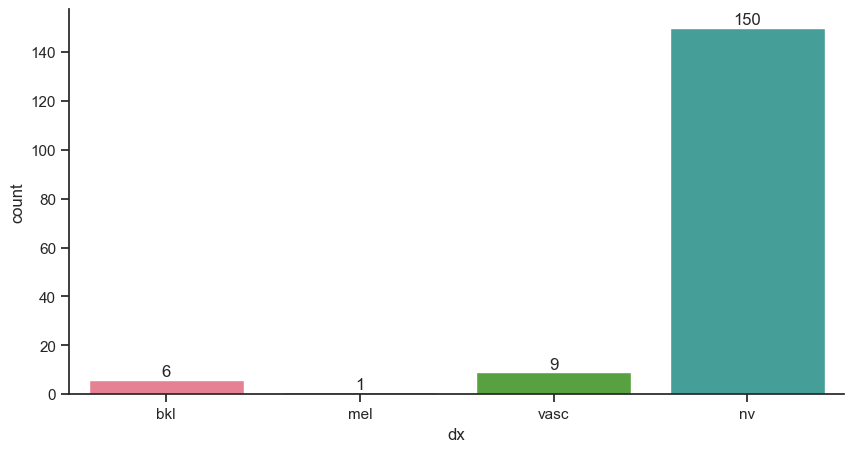

In [24]:
# grafico da variavel dx (tipo de lesao) da faixa etaria de 0 anos 
fig, ax2 = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(x=faixa_etaria0.dx, ax=ax2)
ax2.bar_label(ax2.containers[0])
plt.show()

Para a faixa étaria de 0 a 10 anos, a maioria das lesões permanecem sendo a classe ***nv***, com cerca de 150 casos. 

Abaixo está o gráfico da quantidade de casos em todo o nosso dataset por sexo, que é a nossa variável ***sex***.

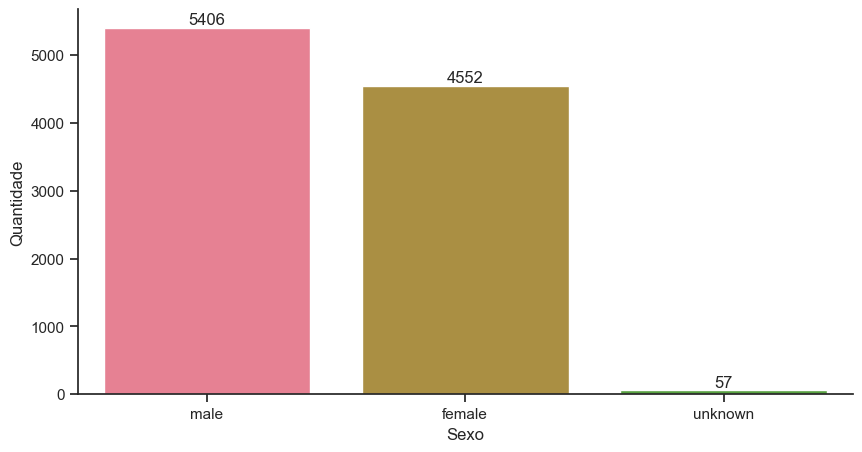

In [25]:
# grafico da variavel sex (sexo) 
fig, ax3 = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(x=dados_cancer_pele.sex, ax=ax3)
ax3.bar_label(ax3.containers[0])
plt.ylabel('Quantidade')
plt.xlabel('Sexo')
plt.show()

Nota-se que a variável sexo está balanceada, sendo 5.406 casos em homens registrados, 4.552 casos em mulheres e 57 casos em que não foi indentificado o sexo da pessoa.

Abaixo está um gráfico de barras da variavel dx_type (como a lesao foi indentificada) por sex (sexo), a fim de observar a quantidade de homens em mulheres por cada tipo de indentificação.

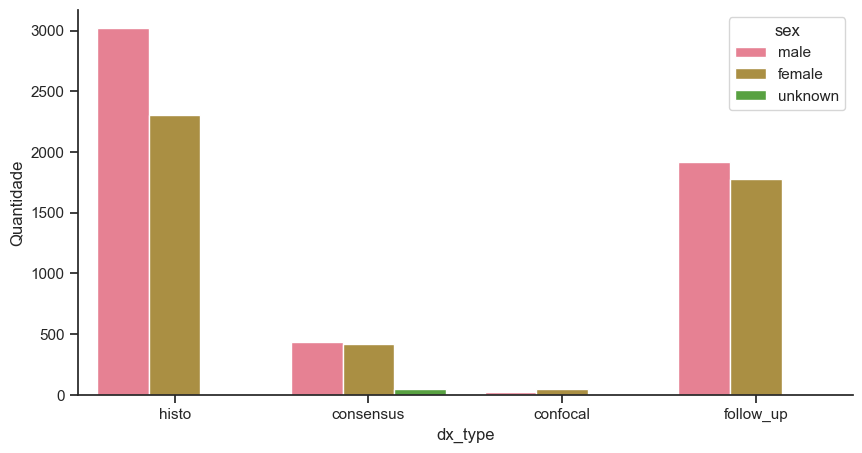

In [26]:
# grafico da variavel dx_type (como a lesao foi indentificada) pela variavel sex (sexo) 
fig, ax4 = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(x=dados_cancer_pele.dx_type, hue=dados_cancer_pele.sex, ax=ax4)
ax.bar_label(ax4.containers[0])
ax.bar_label(ax4.containers[1])
ax.bar_label(ax4.containers[2])
plt.ylabel('Quantidade')
plt.show()

Um ponto importante é que as pessoas a qual não foram indentificas o sexo, todas pertencem a classe ***consensus*** da variável dx_type (como a lesão foi indentificada). As demais classes, possuem um balanceamento, nota-se que as mulheres são a maioria em todas as classes, menos na classe ***confocal***, com 24 casos contra 45 casos em homens.

A seguir, veremos um gráfico para identificar a localização dessas lesões, ou seja, onde elas mais ocorrem.

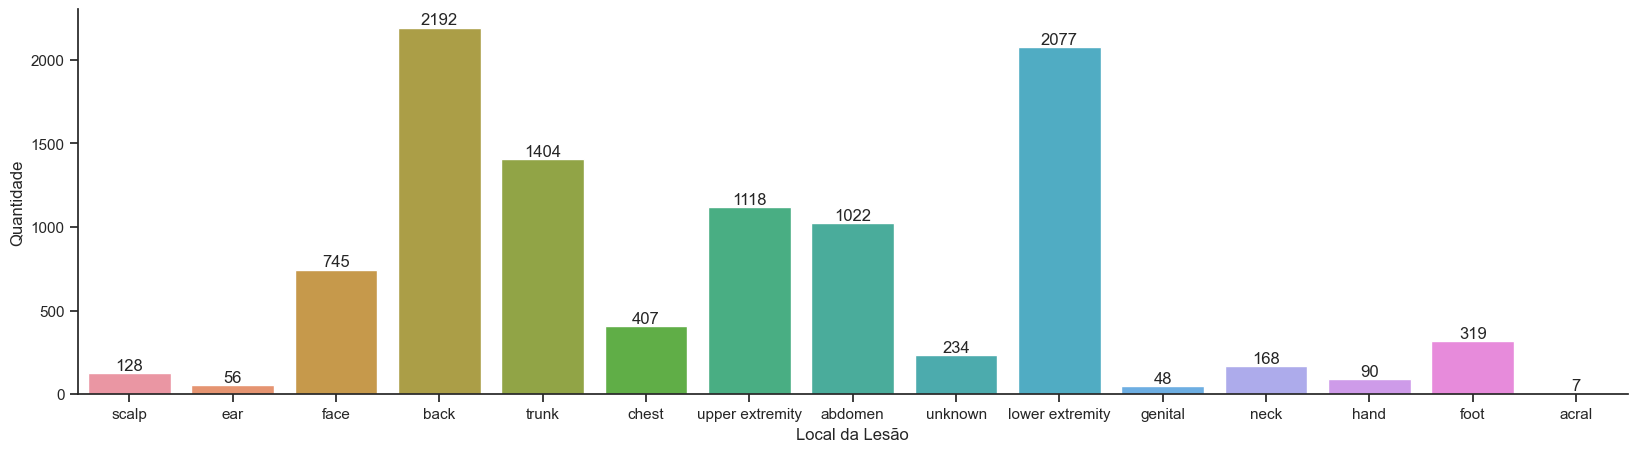

In [27]:
# grafico da variavel localization(localizacao da lesao)
fig, ax5 = plt.subplots(1, 1, figsize=(20, 5))
sns.countplot(x=dados_cancer_pele.localization, ax=ax5)
ax5.bar_label(ax5.containers[0])
plt.xlabel('Local da Lesão')
plt.ylabel('Quantidade')
plt.show()

É possível perceber que os casos mais acontecem nas costas, sendo 2.192 casos e em segundo lugar estão os casos nas extremidades mais baixas do corpo, com 2.077 casos. A parte do corpo a qual menos possuem casos, são os pés/calcanhares, com 7 casos em nosso conjunto de dados.

## Plot das Imagens

A seguir, plotaremos algumas imagens com os devidos rótulos.

In [28]:
# informacoes do dataset
dados_cancer_pele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lesion_id       10015 non-null  object 
 1   image_id        10015 non-null  object 
 2   dx              10015 non-null  object 
 3   dx_type         10015 non-null  object 
 4   age             10015 non-null  float64
 5   sex             10015 non-null  object 
 6   localization    10015 non-null  object 
 7   dx_categorical  10015 non-null  int8   
dtypes: float64(1), int8(1), object(6)
memory usage: 557.6+ KB


In [29]:
# mostra as 5 primeiras linhas
dados_cancer_pele.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dx_categorical
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2


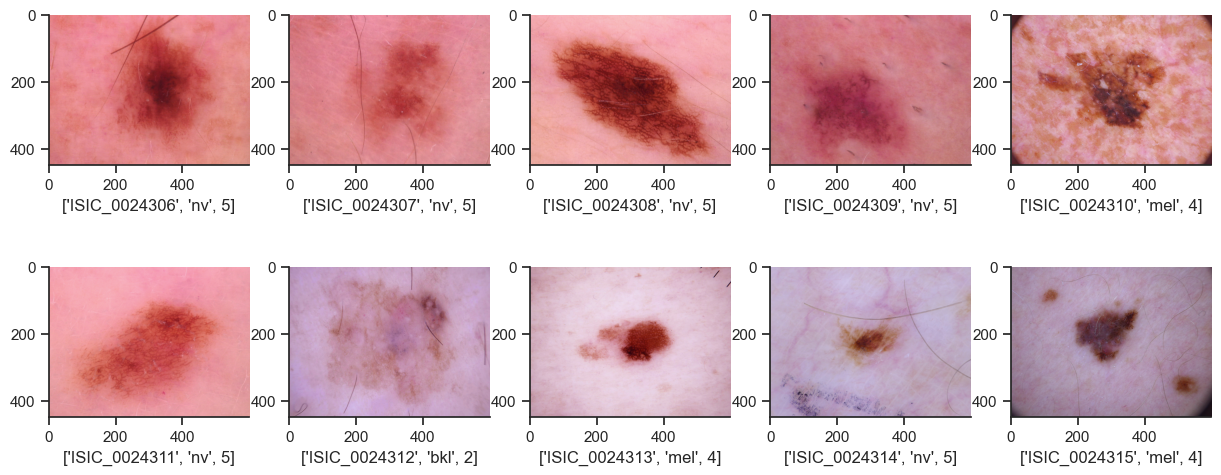

In [30]:
# passa o path das imagens
path_imagens = 'Datasets\images_part1_e_part2'

# lista as imagens
lista_imagens = os.listdir(path_imagens)

# plota 10 imagens mostrando o id_image, dx_categorical(tipo de lesao categorizada) e o dx(tipo de lesao)
figura = plt.figure(figsize=(15,6))
for i in range(len(lista_imagens[:10])):
    plt.subplot(2,5,i+1)
    # le a imagem direto do diretorio e pega o nome dela
    img = plt.imread(os.path.join(path_imagens, lista_imagens[i]))
    # pega o nome da imagem com a extensao
    id_img = os.path.basename(lista_imagens[i])
    # retira a extensao da imagem deixando somente o nome
    id_img_sem_ext = os.path.splitext(id_img)[0]
    # compara o nome da imagem com o nome da imagem (id_image) do dataset
    info_img = dados_cancer_pele[dados_cancer_pele['image_id'] == id_img_sem_ext]
    plt.xlabel([info_img['image_id'].values[0], info_img['dx'].values[0], info_img['dx_categorical'].values[0]])  
    plt.imshow(img)
 

In [31]:
# tamanho das imagens
img.shape

(450, 600, 3)

As imagens estão em um tamanho de 450 pixels de altura e 600 pixels de largura, sendo 3 canais de cores (RGB). Essa é uma importante informação antes de treinarmos os modelos, pois precisaremos passar esse paramêtro para as redes neurais convolucionais.

## Divisão do Dataset de Treino, Validação e Teste e Pré Processamento

Como vimos no dataset anteriormente, possuimos um desbalanceamento grande nas classes, sendo assim, faremos um aumento das classes minoritárias somente no dataset de treino, mas antes iremos fazer uma normalização das imagens e diminuir o tamanho delas, pois é possível notar com o plot anterior que elas estão em uma escala muito grande, como visto anteriormente.

In [6]:
# define a semente para que a amostragem aleatoria seja repetivel
seed = 42
np.random.seed(seed)

# calcula o numero de linhas do dataframe
total_linhas = len(dados_cancer_pele)

# embaralha os indices aleatoriamente
indices_embaralhados = np.random.permutation(total_linhas)

# pega 80% dos indices embaralhados do dataset para treino e 30% para teste
linhas_80_perc = int(total_linhas * 0.8)
indices_treino = indices_embaralhados[:linhas_80_perc]
indices_teste = indices_embaralhados[linhas_80_perc:]

# cria um novo dataframe de treino com as amostras embaralhadas contendo o id da imagem e a classe correspondente
treino = dados_cancer_pele.iloc[indices_treino][['image_id', 'dx_categorical']]
treino.reset_index(inplace=True, drop=True)

# cria um novo dataframe de teste com as amostras embaralhadas contendo o id da imagem e a classe correspondente
teste = dados_cancer_pele.iloc[indices_teste][['image_id', 'dx_categorical']]
teste.reset_index(inplace=True, drop=True)

In [7]:
# transforma as classes de treino e teste em string
treino['dx_categorical'] = treino.dx_categorical.astype(str)
teste['dx_categorical'] = teste.dx_categorical.astype(str)

In [8]:
# mostra as 5 primeiras linhas e a quantidade de registros que tem no dataset de treino
print(treino.head(5))
print()
print(f'Quantidade de linhas: {len(treino)}')

       image_id dx_categorical
0  ISIC_0033272              4
1  ISIC_0031923              5
2  ISIC_0026652              4
3  ISIC_0030583              2
4  ISIC_0034010              5

Quantidade de linhas: 8012


In [9]:
# mostra as 5 primeiras linhas e a quantidade de registros que tem no dataset de teste
print(teste.head(5))
print()
print(f'Quantidade de linhas: {len(teste)}')

       image_id dx_categorical
0  ISIC_0025549              5
1  ISIC_0026751              5
2  ISIC_0032966              5
3  ISIC_0024544              5
4  ISIC_0031853              2

Quantidade de linhas: 2003


In [10]:
# separa o dataframe de treino em conjuntos de treinamento e validacao
df_treino = treino.sample(frac=0.8, random_state=42)  # 70% para treinamento
df_validacao = treino.drop(df_treino.index)         # 30% para validação
df_teste = teste         # passa o dataset de treino para outra variavel

In [11]:
# mostra as 5 primeiras linhas do dataframe de treinamento
df_treino.head(5)

,image_id,dx_categorical
4523,ISIC_0032377,5
4680,ISIC_0026565,5
5832,ISIC_0028881,2
3827,ISIC_0025055,5
2470,ISIC_0024946,0


In [12]:
# mostra as 5 primeiras linhas do dataframe de validacao
df_validacao.head(5)

,image_id,dx_categorical
3,ISIC_0030583,2
4,ISIC_0034010,5
5,ISIC_0024424,5
9,ISIC_0025525,5
16,ISIC_0028090,5


In [13]:
# mostra as 5 primeiras linhas do dataframe de teste
df_teste.head(5)

,image_id,dx_categorical
0,ISIC_0025549,5
1,ISIC_0026751,5
2,ISIC_0032966,5
3,ISIC_0024544,5
4,ISIC_0031853,2


In [14]:
# tamanho dos conjuntos de treinamento, validacao e teste
tamanho_treino = len(df_treino)
tamanho_validacao = len(df_validacao)
tamanho_teste = len(df_teste)

# printa o tamanho dos conjuntos de treinamento, validacao e teste e a soma deles
print(f'Tamanho do dataset de treino: {tamanho_treino}')
print(f'Tamanho do dataset de validação: {tamanho_validacao}')
print(f'Tamanho do dataset de teste: {tamanho_teste}')
print(f'Soma dos datasets: {tamanho_treino + tamanho_validacao + tamanho_teste}')

Tamanho do dataset de treino: 6410
Tamanho do dataset de validação: 1602
Tamanho do dataset de teste: 2003
Soma dos datasets: 10015


In [15]:
# acrescenta a string '.jpg' ao de cada ID da imagem para que fique igual ao da pasta contendo as imagens
df_treino['image_id'] = df_treino.image_id + '.jpg'
df_validacao['image_id'] = df_validacao.image_id + '.jpg'
df_teste['image_id'] = df_teste.image_id + '.jpg'

In [16]:
# geradores de imagens para treinamento e validacao
train_datagen = ImageDataGenerator(
    rescale = 1.0 / 255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

# normaliza o dataset de teste
test_datagen = ImageDataGenerator(
    rescale = 1.0 / 255,
)

In [17]:
# geradores de fluxo de dados
train_generator = train_datagen.flow_from_dataframe(
    dataframe = df_treino,
    directory = 'Datasets\images_part1_e_part2',
    x_col = 'image_id',
    y_col = 'dx_categorical',
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe = df_validacao,
    directory = 'Datasets\images_part1_e_part2',
    x_col = 'image_id',
    y_col = 'dx_categorical',
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_dataframe(
dataframe = df_teste,
directory = 'Datasets\images_part1_e_part2',
x_col = 'image_id',
y_col = 'dx_categorical',
batch_size = 32,
class_mode = 'categorical',
target_size = (128, 128)
)

Found 6410 validated image filenames belonging to 7 classes.
Found 1602 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


## Construção dos Modelos

### LeNet-5

In [21]:
# arquitetura do modelo LeNet-5
lenet5 = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(7, activation='softmax')  
])

# compila o modelo
lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# sumario da arquitetura
lenet5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d_4 (Conv2D)           (None, 124, 124, 6)       456       
                                                                 
 average_pooling2d_4 (Avera  (None, 62, 62, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 58, 58, 16)        2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 29, 29, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 13456)             0         
                                                                 
 dense_6 (Dense)             (None, 120)               1614840   
                                                                 
 dense_7 (Dense)             (None, 84)                10164     
          

In [22]:
# checkpoint para salvar o melhor modelo baseado na acuracia de validacao
checkpointer_lenet5 = ModelCheckpoint(filepath='Modelos/lenet5.hdf5', verbose=1, save_best_only=True, monitor='val_accuracy')

# defini a quantidade de epocas
epochs = 50

# treina o modelo
history = lenet5.fit(
            x=train_generator,
            epochs=epochs,
            verbose=1, 
            callbacks=[checkpointer_lenet5], 
            shuffle=True,
            validation_data=validation_generator)

Epoch 1/50
201/201 [==============================] - ETA: 0s - loss: 1.0476 - accuracy: 0.6640
Epoch 1: val_accuracy improved from -inf to 0.67041, saving model to Modelos\lenet5.hdf5
201/201 [==============================] - 120s 593ms/step - loss: 1.0476 - accuracy: 0.6640 - val_loss: 0.9464 - val_accuracy: 0.6704
Epoch 2/50


c:\Users\vinip\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


201/201 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.6690
Epoch 2: val_accuracy did not improve from 0.67041
201/201 [==============================] - 111s 555ms/step - loss: 0.9630 - accuracy: 0.6690 - val_loss: 0.9496 - val_accuracy: 0.6698
Epoch 3/50
201/201 [==============================] - ETA: 0s - loss: 0.9419 - accuracy: 0.6697
Epoch 3: val_accuracy improved from 0.67041 to 0.67478, saving model to Modelos\lenet5.hdf5
201/201 [==============================] - 119s 592ms/step - loss: 0.9419 - accuracy: 0.6697 - val_loss: 0.9620 - val_accuracy: 0.6748
Epoch 4/50
201/201 [==============================] - ETA: 0s - loss: 0.9216 - accuracy: 0.6758
Epoch 4: val_accuracy improved from 0.67478 to 0.69101, saving model to Modelos\lenet5.hdf5
201/201 [==============================] - 121s 601ms/step - loss: 0.9216 - accuracy: 0.6758 - val_loss: 0.8975 - val_accuracy: 0.6910
Epoch 5/50
201/201 [==============================] - ETA: 0s - loss: 0.9082 - accu

In [24]:
# carrega o modelo lenet5 direto da pasta
model_lenet5 = load_model('Modelos/lenet5.hdf5')

# faz o predict no conjunto de teste
metricas_lenet5 = model_lenet5.evaluate(test_generator, verbose=0)

# mostra as metricas obtidas no conjunto de teste
print('Loss do Conjunto de Teste:', metricas_lenet5[0])
print('Acurácia do Conjunto de Teste:', metricas_lenet5[1])

NameError: name 'load_model' is not defined

### VICNET V (Estrutura Autoral)

In [ ]:
# arquitetura do modelo VICNET V
vicnet_v = Sequential([
    Conv2D(128, (2, 2), activation='relu', input_shape=(28, 28, 3)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    Conv2D(128, (2, 2), activation='relu'),
    BatchNormalization(),

    Conv2D(64, (2, 2), activation='relu'),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    Conv2D(64, (2, 2), activation='relu'),
    BatchNormalization(),

    Flatten(),
    Dense(2048, activation='relu'),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dense(7, activation='softmax')  
])

# compila o modelo
vicnet_v.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# sumario da arquitetura
vicnet_v.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_310 (Conv2D)         (None, 27, 27, 128)       1664      
                                                                 
 conv2d_311 (Conv2D)         (None, 26, 26, 128)       65664     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_312 (Conv2D)         (None, 12, 12, 128)       65664     
                                                                 
 conv2d_313 (Conv2D)         (None, 11, 11, 128)       65664     
                                                                 
 batch_normalization_70 (Ba  (None, 11, 11, 128)       512       
 tchNormalization)                                   

In [ ]:
# checkpoint para salvar o melhor modelo baseado na acuracia de validacao
checkpointer_vicnetv = ModelCheckpoint(filepath='Modelos/vicnetv.hdf5', verbose=1, save_best_only=True, monitor='val_accuracy')

# defini a quantidade de epocas
epochs = 50

# treina o modelo
history = vicnet_v.fit(
            x=train_generator,
            epochs=epochs,
            verbose=1, 
            callbacks=[checkpointer_vicnetv], 
            shuffle=True,
            validation_data=validation_generator)

In [ ]:
# carrega o modelo lenet5 direto da pasta
model_vicnetv = load_model('Modelos/vicnetv.hdf5')

# faz o predict no conjunto de teste
metricas_vicnetv = model_vicnetv.evaluate(test_generator, verbose=0)

# mostra as metricas obtidas no conjunto de teste
print('Loss do Conjunto de Teste:', metricas_vicnetv[0])
print('Acurácia do Conjunto de Teste:', metricas_vicnetv[1])

Loss do Conjunto de Teste: 0.8856707215309143
Acurácia do Conjunto de Teste: 0.6895174980163574


### VICNET X (Estrutura Autoral)

## Comparação das Métricas Obtidas 

## Conclusão